# BUSINESS CASE : PRICE AND COST ESCENARIOS

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Defining variables and constants

In [11]:
x = 3
y = x + 2

## Creating graph models

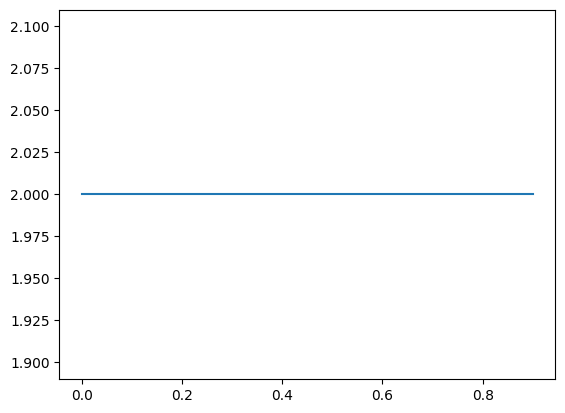

In [14]:
@np.vectorize
def constant_function(x):
    return 2


t1 = np.arange(0.0, 1.0, 0.1)
plt.plot(t1, constant_function(t1))
plt.show()